# Modelos No Supervisados con Python
---
#### Por Jaime de Cecilio


Base de datos Viviendas. 

Vamos a poner en práctica las virtudes vistas en clase de los distintos algoritmos de aprendizaje no supervisado que hemos clasificado en los siguientes bloques:

- Reducción dimensional - PCA, KERNEL PCA, SPARSE PCA,...
- Proyección o representación (MAINFOLD) - TSNE, UMAP, ISOMAP,...
- Clustering: kmeans, clustering jerárquico, gaussian mixture models, dbscan,...

Recordad la necesidad de trabajar con variables normalizadas y la necesidad de realizar transformadas sobre las variables categóricas con algunos de los algoritmos.

Tened en cuenta que hemos visto, además varias formas de representar la salida de estos datos y de procesos de selección de hiperparámetros (número de componentes, función de distancia a utilizar, tamaño de vecindario, preplexity,... según el caso)


===========================================

La base de datos sobre la que trabajaréis es una tabla histórica que contiene información sobre distintos inmuebles, sus características, tasaciones y su precio de venta.

Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales (alta, media y baja densidad).

Pregunta 1.1 Realizar una primera transformación de los datos en la que generes un conjunto de train y otro de test.

Pregunta 1.2 Genera una nueva tabla train con nuevas columnas numéricas asociadas a las variables categóricas que creas oportunas y vayas a utilizar. Trata los valores missing (apóyate en la práctica anterior)

Pregunta 2 ¿De qué manera podrías identificar valores atípicos?

Pregunta 2.1 Aplica bien un PCA u otro algoritmo de proyección para identificar grupos de baja frecuencia o peculiares teniendo en cuenta todas las dimensiones posibles (no tienes por qué usar todas).

Pregunta 2.2 ¿Qué algoritmo de clustering y sobre que variables (podrían ser las componentes anteriores...) aplicarías para identificar adecuadamente esos valores raros?

Pregunta 3: Estudiaste la relación de la variable precio con el resto de las variables cuantitativas durante el año 2009 y 2010. Estudia la correlación entre ellas y argumenta el uso de PCA o KernelPCA en base a esas relaciones.

Pregunta 3.1: Aplica el modelo elegido y describe las 3 primeras componentes generadas, ¿qué varianza explica cada una? ¿Con qué variables se relacionada cada una? ¿Cómo indicadores de varianza en el sistema y en base a la relación con otras variables que nombres les darías?

### Resolucion de la práctica. 

Importamos las librerias y cargamos los datos 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

from time import sleep
from random import shuffle

import numpy as np
from numpy import atleast_2d
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KDTree
from sklearn.decomposition import KernelPCA

from hdbscan import HDBSCAN

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import matplotlib.ticker as ticker
import seaborn as sns

from IPython import display
from pyod.models.knn import KNN



data = pd.read_excel("/Users/jaime2/Desktop/DATA SCIENCE/4.1 MODELOS NO SUPERVISADOS/ENTREGAS/ENTREGA_2/BDpracticafinal.xlsx")

In [2]:
data.shape

(2930, 29)

##### 1 Transformacion de los datos y generar el conjunto train y conjunto set

In [3]:
data.columns = data.columns.str.replace(" ","_")
data.head(5)

,Order,MS_Zoning,Lot_Frontage,Lot_Area,Land_Contour,Land_Slope,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Type,...,Kitchen_Qual,TotRms_AbvGrd,Garage_Cars,Garage_Area,Garage_Cond,Pool_Area,Pool_QC,Mo_Sold,Yr_Sold,SalePrice
0,1,RL,141.0,31770,Lvl,Gtl,6,1960,1960,Stone,...,TA,7,2.0,528.0,TA,0,Sp,5,2010,215000
1,2,RH,80.0,11622,Lvl,Gtl,5,1961,1961,None,...,TA,5,1.0,730.0,TA,0,Sp,6,2010,105000
2,3,RL,81.0,14267,Lvl,Gtl,6,1958,1958,BrkFace,...,Gd,6,1.0,312.0,TA,0,Sp,6,2010,172000
3,4,RL,93.0,11160,Lvl,Gtl,7,1968,1968,None,...,Ex,8,2.0,522.0,TA,0,Sp,4,2010,244000
4,5,RL,74.0,13830,Lvl,Gtl,5,1997,1998,None,...,TA,6,2.0,482.0,TA,0,Sp,3,2010,189900


In [4]:
def missing_summary(dataframe):
    num_elementos = data.count()
    num_missing = data.isna().sum()
    missing_summary = pd.DataFrame(index=num_elementos.index, 
                               data={'total':num_elementos, 
                                     'missing':num_missing,
                                     'missing_rate (%)': round(num_missing/num_elementos * 100, 2)})
    return missing_summary

In [5]:
#Aplicamos a la base de datos la funcion missing, buscamos obtener el conjunto de datos limpio.

data_summary = missing_summary(data)
data_summary

,total,missing,missing_rate (%)
Order,2930,0,0.00
MS_Zoning,2930,0,0.00
Lot_Frontage,2440,490,20.08
Lot_Area,2930,0,0.00
Land_Contour,2930,0,0.00
Land_Slope,2930,0,0.00
Overall_Qual,2930,0,0.00
Year_Built,2930,0,0.00
Year_Remod/Add,2930,0,0.00
Mas_Vnr_Type,2907,23,0.79


In [6]:
#imputamos valores a los datos missing.

data['Lot_Frontage'] = data['Lot_Frontage'].fillna(0)
data['Mas_Vnr_Type']= data['Mas_Vnr_Type'].fillna('None')
data['Garage_Cars']= data['Garage_Cars'].fillna(0)
data['Garage_Area']= data['Garage_Area'].fillna(0)
data['Garage_Cond']= data['Garage_Cond'].fillna('Sg')

In [7]:
#Volvemos a aplicar la funcion y vemos que ya no hay missing values. 

missing_summary(data)

,total,missing,missing_rate (%)
Order,2930,0,0.0
MS_Zoning,2930,0,0.0
Lot_Frontage,2930,0,0.0
Lot_Area,2930,0,0.0
Land_Contour,2930,0,0.0
Land_Slope,2930,0,0.0
Overall_Qual,2930,0,0.0
Year_Built,2930,0,0.0
Year_Remod/Add,2930,0,0.0
Mas_Vnr_Type,2930,0,0.0


In [8]:
# Ahora vamos a modificar el tipo de dato y dejamos corectamente en formato fecha

In [9]:
data['Garage_Cars'] = data['Garage_Cars'].astype(int)

In [10]:
data['Date_Sold'] = pd.to_datetime(data['Yr_Sold'].astype(str) + '-' + data['Mo_Sold'].astype(str), format='%Y-%m')

In [11]:
#vamos a generar el conjunto train y el conjunto test.

In [12]:
data.shape[0]*0.8

2344.0

In [13]:
train_index = np.random.choice(data.index,round(data.shape[0]*0.8),replace=False)
test_index = data.index[data.index.isin(train_index) == False]

In [14]:
data_train = data.copy().iloc[train_index,]
data_test = data.copy().iloc[test_index,]
data_test = data.copy().drop(train_index, axis=0)

In [15]:
from sklearn.model_selection import train_test_split
dt_train, dt_test = train_test_split(data, test_size =0.2)

In [16]:
dt_train.reset_index(drop=True)

,Order,MS_Zoning,Lot_Frontage,Lot_Area,Land_Contour,Land_Slope,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Type,...,TotRms_AbvGrd,Garage_Cars,Garage_Area,Garage_Cond,Pool_Area,Pool_QC,Mo_Sold,Yr_Sold,SalePrice,Date_Sold
0,1,RL,141.0,31770,Lvl,Gtl,6,1960,1960,Stone,...,7,2,528.0,TA,0,Sp,5,2010,215000,2010-05-01
1,2921,RM,21.0,1894,Lvl,Gtl,4,1970,1970,None,...,6,1,286.0,TA,0,Sp,4,2006,71000,2006-04-01
2,1089,RL,51.0,8029,Lvl,Gtl,6,2005,2005,None,...,8,2,400.0,TA,0,Sp,7,2008,176000,2008-07-01
3,2348,RL,80.0,10400,Lvl,Gtl,7,1988,1988,BrkFace,...,6,2,604.0,TA,0,Sp,6,2006,241500,2006-06-01
4,1390,RL,94.0,9239,Lvl,Gtl,5,1963,2003,None,...,6,1,300.0,TA,0,Sp,5,2008,144900,2008-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,1811,RL,70.0,8462,Lvl,Gtl,6,1994,1994,BrkFace,...,7,2,471.0,TA,0,Sp,7,2007,201000,2007-07-01
2340,1371,RM,60.0,10320,Lvl,Gtl,6,1906,1995,None,...,7,1,216.0,TA,0,Sp,6,2008,135000,2008-06-01
2341,1674,RH,33.0,4113,Lvl,Gtl,6,2001,2001,None,...,5,2,511.0,TA,0,Sp,7,2007,155000,2007-07-01
2342,1374,RL,115.0,21286,Lvl,Gtl,5,1948,1950,None,...,7,1,312.0,TA,0,Sp,8,2008,135000,2008-08-01


##### Por un tema de orden de variables voy a repsonder primero a al prengunta 2.1, y dare respuesta a la pregunta 2 (¿De qué manera podrías identificar valores atípicos?) un par de lineas mas abajo dentro de la resolucion de pregunta 2.1

##### Pregunta 2.1 Aplica bien un PCA u otro algoritmo de proyección para identificar grupos de baja frecuencia o peculiares teniendo en cuenta todas las dimensiones posibles (no tienes por qué usar todas).

In [17]:
# Realizamos el PCA solo con variables numéricas. 

In [18]:
dt_num_train = dt_train.select_dtypes(include=np.number)

In [19]:
df_ms_num_train = missing_summary(dt_num_train)

In [20]:
df_ms_num_train.index[df_ms_num_train.missing == 0]

Index(['Order', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area', 'Land_Contour',
       'Land_Slope', 'Overall_Qual', 'Year_Built', 'Year_Remod/Add',
       'Mas_Vnr_Type', 'Exter_Qual', 'Bsmt_Cond', 'Total_Bsmt_SF',
       'Heating_QC', 'Central_Air', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Garage_Cars',
       'Garage_Area', 'Garage_Cond', 'Pool_Area', 'Pool_QC', 'Mo_Sold',
       'Yr_Sold', 'SalePrice', 'Date_Sold'],
      dtype='object')

In [21]:
vars_wo_ms = dt_num_train.columns[dt_num_train.columns.isin(['MS_Zoning', 'Lot_Area','Land_Contour',
 'Land_Slope',
 'Overall_Qual',
 'Year_Built',
 'Year_Remod/Add',
 'Exter_Qual',
 'Bsmt_Cond',
 'Total_Bsmt_SF',
 'Heating_QC',
 'Central_Air',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
  'Garage_Cars', 'SalePrice'])]

##### *(Pregunta 2 ¿De qué manera podrías identificar valores atípicos?) 
Hago un pqueño parentesis antes de continuar con el PCA para responder a esta pregunta. 
He utilziado un codigo que identifica de manera directa todos los valores outliers.

In [22]:
#He utilizado este codigo que he encontrado que te devuelve de manera directa cuales son todos los valores que 
# considera outliers para hacer un primer analisis de valores atipicos de manera rapida y sencilla. 

X = data.loc[:,vars_wo_ms]
 
clf = KNN(contamination=0.18)
clf.fit(X)
y_pred = clf.predict(X)
X[y_pred == 1]

,Lot_Area,Overall_Qual,Year_Built,Year_Remod/Add,Total_Bsmt_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Garage_Cars,SalePrice
0,31770,6,1960,1960,1080,1,0,3,2,215000
8,5389,8,1995,1996,1595,2,0,2,2,236500
15,53504,8,2003,2003,1650,3,1,4,3,538000
17,11394,9,2010,2010,1856,1,1,1,3,394432
18,19138,4,1951,1951,864,1,0,2,2,141000
...,...,...,...,...,...,...,...,...,...,...
2914,1484,4,1972,1972,546,1,1,3,1,79400
2918,1526,4,1970,1970,546,1,1,3,0,79500
2920,1894,4,1970,1970,546,1,1,3,1,71000
2923,17400,5,1977,1977,1126,2,0,3,2,160000


In [23]:
# Volvemos a la pregunta 2.1 y vamos a hacer 2 PCA, uno con todas las variables y otro solo con 
# las variables mas relevantes

In [24]:
dt_num_trainPCA = dt_num_train.loc[:,vars_wo_ms]

In [25]:
dt_num_trainPCA.head(10)

,Lot_Area,Overall_Qual,Year_Built,Year_Remod/Add,Total_Bsmt_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Garage_Cars,SalePrice
0,31770,6,1960,1960,1080,1,0,3,2,215000
2920,1894,4,1970,1970,546,1,1,3,1,71000
1088,8029,6,2005,2005,728,2,1,3,2,176000
2347,10400,7,1988,1988,1845,2,0,3,2,241500
1389,9239,5,1963,2003,960,1,0,3,1,144900
522,7500,8,2006,2007,1372,2,0,2,2,238500
120,9900,5,1966,1966,1209,1,0,3,2,159000
2517,11250,6,1977,1977,1208,1,1,3,2,165000
180,8239,5,1920,1962,1008,1,0,3,1,100000
428,11308,9,2008,2008,1104,2,1,3,3,335000


In [26]:
# Creamos el conjunto de test de PCA, solo las numericas, o sea otra subdisivision dentro del train.

In [27]:
import time
from sklearn.decomposition import PCA, SparsePCA
from sklearn.manifold import TSNE, Isomap
 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

In [28]:
dt_num_testPCA = dt_test.loc[:,vars_wo_ms]

In [29]:
train_scaler = StandardScaler().fit(dt_num_trainPCA)

#sobre el conjunto de train hacemos el Scaler,
#obtenemos conjuntos princpiales, esos mismo obtenidos lo aplicamos al conjunto de test. tercera linea de codigo.

x_train = train_scaler.transform(dt_num_trainPCA)

x_test = train_scaler.transform(dt_num_testPCA)

pca = PCA(n_components=3)
pcaNumModel = pca.fit(x_train)
principalComponents = pcaNumModel.transform(x_train)

In [30]:
print(np.sum(pcaNumModel.explained_variance_ratio_))

#68% con 3 componentes, esta por encima del 50% entonces es satisfactorio el PCA. 

0.6817702610884528


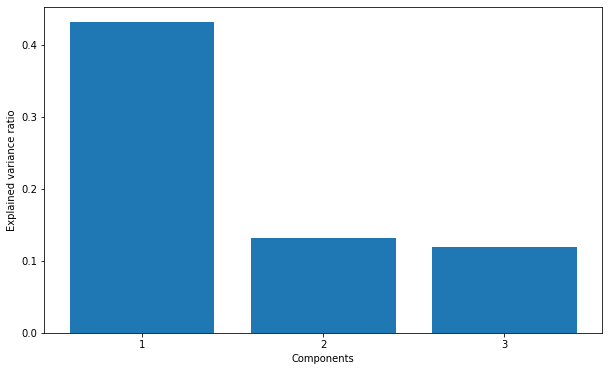

In [31]:
#graficamos este resultado anterior

ev = pca.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(ev) + 1, 1), ev)
ax.set_xticks(np.arange(1, len(ev) + 1, 1))
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')

plt.show()

In [32]:
#hacemos lo mismo para test
pca_test = PCA(n_components=3)
pcaNumModel_test = pca_test.fit(x_test)
principalComponents = pcaNumModel_test.transform(x_test)

print(np.sum(pcaNumModel_test.explained_variance_ratio_))

0.7058091714158561


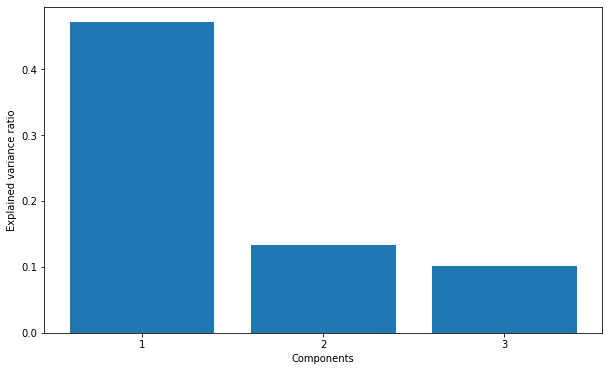

In [33]:
#graficamos este resultado anterior.
ev_test = pca_test.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(ev) + 1, 1), ev_test)
ax.set_xticks(np.arange(1, len(ev) + 1, 1))
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')

plt.show()
#vemos que hay una gran diferencia en el componente 2. 

##### Medimos la verosimilitud. 
La probabilidad de que los datos pertenezcan a los componentes principales. 
Medimos la bondad del PCA
Lo haremos sobre test



In [34]:
logvero_PCA1 = pcaNumModel_test.score_samples(x_test)
mean = logvero_PCA1.mean()
std = logvero_PCA1.std()

print(mean-std)
print(mean+std)

-16.63399387299632
-7.076447516057244


In [35]:
dt_test.loc[logvero_PCA1 <= mean-std,]

,Order,MS_Zoning,Lot_Frontage,Lot_Area,Land_Contour,Land_Slope,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Type,...,TotRms_AbvGrd,Garage_Cars,Garage_Area,Garage_Cond,Pool_Area,Pool_QC,Mo_Sold,Yr_Sold,SalePrice,Date_Sold
945,946,I,109.0,21780,Lvl,Gtl,2,1910,1950,None,...,4,1,280.0,TA,0,Sp,3,2009,57625,2009-03-01
423,424,RL,105.0,15431,Lvl,Gtl,10,2008,2008,Stone,...,10,3,672.0,TA,0,Sp,4,2009,555000,2009-04-01
2308,2309,RL,0.0,39384,Low,Sev,6,1957,1957,Stone,...,4,2,550.0,TA,0,Sp,10,2006,252000,2006-10-01
2766,2767,RL,62.0,70761,Low,Mod,7,1975,1975,None,...,5,2,576.0,TA,0,Sp,12,2006,280000,2006-12-01
379,380,RL,80.0,9600,Lvl,Gtl,8,1981,1981,None,...,9,2,542.0,TA,0,Sp,7,2009,278000,2009-07-01
1401,1402,RL,73.0,39104,Low,Sev,7,1954,2005,None,...,5,2,439.0,TA,0,Sp,4,2008,241500,2008-04-01
2116,2117,RL,0.0,53107,Low,Mod,6,1992,1992,None,...,9,2,501.0,TA,0,Sp,6,2007,240000,2007-06-01
1503,1504,RL,74.0,6845,Lvl,Gtl,4,1955,1955,BrkCmn,...,6,0,0.0,Sg,0,Sp,7,2008,82500,2008-07-01
940,941,RM,50.0,8660,Bnk,Gtl,5,1900,1993,None,...,11,2,576.0,TA,0,Sp,12,2009,123000,2009-12-01
1879,1880,RL,0.0,10899,Lvl,Gtl,4,1964,1964,None,...,8,3,530.0,TA,0,Sp,4,2007,103000,2007-04-01


Hasta ahora hemos hecho un PCA con todas las columnas numericas, que explica un 66%
de los datos; lo que vamos a hacer ahora es con un subconjunto menor de columnas considerando
el conjunto relevante. Para identificar que es relevantes, usaremos correlaciones.

Haremos una correclacion con respecto al precio de venta y segun la intensidad de la correlacion veremos cual son relevantes para meterlos en el PCA.

In [36]:
#Ahora vamos a realizar un PCA con solo las variables que consideramos relevantes. 

In [37]:
data_numeric = data.select_dtypes(include=np.number)
data_numeric.head(5)

,Order,Lot_Frontage,Lot_Area,Overall_Qual,Year_Built,Year_Remod/Add,Total_Bsmt_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Garage_Cars,Garage_Area,Pool_Area,Mo_Sold,Yr_Sold,SalePrice
0,1,141.0,31770,6,1960,1960,1080,1,0,3,1,7,2,528.0,0,5,2010,215000
1,2,80.0,11622,5,1961,1961,882,1,0,2,1,5,1,730.0,0,6,2010,105000
2,3,81.0,14267,6,1958,1958,1329,1,1,3,1,6,1,312.0,0,6,2010,172000
3,4,93.0,11160,7,1968,1968,2110,2,1,3,1,8,2,522.0,0,4,2010,244000
4,5,74.0,13830,5,1997,1998,928,2,1,3,1,6,2,482.0,0,3,2010,189900


In [38]:
corr = data_numeric.corr().loc[['SalePrice']].sort_values('SalePrice',ascending=False)
corr = corr.T.sort_values('SalePrice',ascending=False)

<AxesSubplot:>

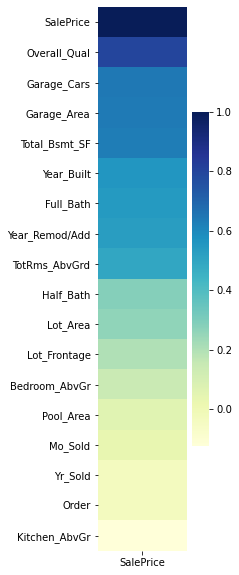

In [39]:
plt.subplots(figsize=(2,10))
sns.heatmap(corr, cmap="YlGnBu")

#vemos que hay un punto en el gráfico en el que el azul deja de ser tan intenso, a partir del 0,7. 
#seleccionamos hasta TotRms_AbvGrd

In [40]:
#seleccionamos solo estas variables que consideramos como relevantes: 

vars_relevantes = dt_num_train.columns[dt_num_train.columns.isin(['SalePrice',
                                                             'Garage_Cars',
                                                             'Garage_Area',
 'Total_Bsmt_SF', 'Year_Built',
 'Full_Bath','Year_Remod/Add','TotRms_AbvGrd'])]

In [41]:
#repetimos lo hecho hasta ahora pero solo considerando las relevantes: 

#primero extremos los datos de las variables que hemos identificado

dt_num_trainPCA_relevantes = dt_num_train.loc[:,vars_relevantes]
dt_num_testPCA_relevantes = dt_test.loc[:,vars_relevantes]

In [42]:
#PCA de relevantes:

train_scaler_relevantes = StandardScaler().fit(dt_num_trainPCA_relevantes)
x_train_relevantes = train_scaler_relevantes.transform(dt_num_trainPCA_relevantes)
x_test_relevantes = train_scaler_relevantes.transform(dt_num_testPCA_relevantes)

pca_relevantes = PCA(n_components=3)
pcaNumModel_relevantes = pca.fit(x_train_relevantes)
principalComponents_relevantes = pcaNumModel_relevantes.transform(x_train_relevantes)

In [43]:
print(np.sum(pcaNumModel_relevantes.explained_variance_ratio_))

#vemos que el resultado ha subido con respecto al anterior

0.7787834744604574


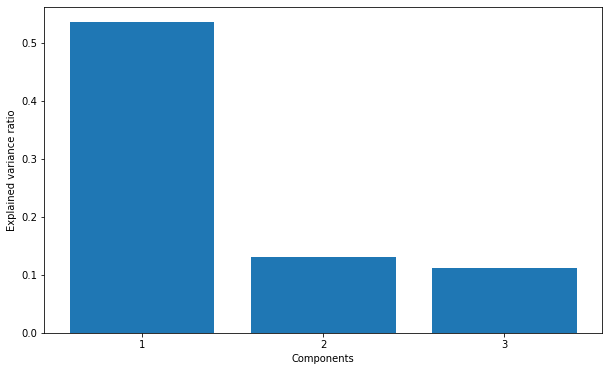

In [44]:
#graficamos este resultado anterior

ev_relevantes = pca.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(ev) + 1, 1), ev_relevantes)
ax.set_xticks(np.arange(1, len(ev) + 1, 1))
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')

plt.show()

In [45]:
# Aplicamos lo mismo pero a test

In [46]:
pca_test_relevantes = PCA(n_components=3)
pcaNumModel_test_relevantes = pca_test_relevantes.fit(x_test_relevantes)
principalComponents_relevantes = pcaNumModel_test_relevantes.transform(x_test_relevantes)

print(np.sum(pcaNumModel_test_relevantes.explained_variance_ratio_))

#El resultado sigue siendo alto, lo cual esta bien. 

0.7849283654532848


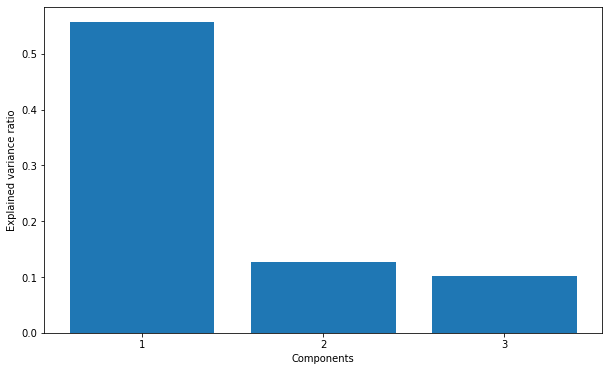

In [47]:
#graficamos:
ev_test_relevantes = pca_test_relevantes.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(ev) + 1, 1), ev_test_relevantes)
ax.set_xticks(np.arange(1, len(ev) + 1, 1))
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')

plt.show()

In [48]:
#Medimos de nuevo la verosimilitud:

logvero_PCA2 = pcaNumModel_test_relevantes.score_samples(x_test_relevantes)
mean_relevantes = logvero_PCA2.mean()
std_relevantes = logvero_PCA2.std()

print(mean_relevantes-std)
print(mean_relevantes+std)

# Vemos que el resultado ha mejorado con respecto al anterior. 

-14.20375168965511
-4.646205332716035


In [49]:
dt_test.loc[logvero_PCA2 <= mean-std,]

,Order,MS_Zoning,Lot_Frontage,Lot_Area,Land_Contour,Land_Slope,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Type,...,TotRms_AbvGrd,Garage_Cars,Garage_Area,Garage_Cond,Pool_Area,Pool_QC,Mo_Sold,Yr_Sold,SalePrice,Date_Sold
423,424,RL,105.0,15431,Lvl,Gtl,10,2008,2008,Stone,...,10,3,672.0,TA,0,Sp,4,2009,555000,2009-04-01
379,380,RL,80.0,9600,Lvl,Gtl,8,1981,1981,None,...,9,2,542.0,TA,0,Sp,7,2009,278000,2009-07-01
940,941,RM,50.0,8660,Bnk,Gtl,5,1900,1993,None,...,11,2,576.0,TA,0,Sp,12,2009,123000,2009-12-01
604,605,RL,85.0,11475,Lvl,Gtl,5,1958,1958,BrkFace,...,9,3,888.0,TA,0,Sp,7,2009,110000,2009-07-01
1879,1880,RL,0.0,10899,Lvl,Gtl,4,1964,1964,None,...,8,3,530.0,TA,0,Sp,4,2007,103000,2007-04-01
757,758,RM,41.0,5852,Bnk,Gtl,7,1902,2000,Stone,...,9,0,0.0,Sg,0,Sp,5,2009,97500,2009-05-01
1967,1968,RL,80.0,8000,Lvl,Gtl,5,1961,1961,None,...,10,0,0.0,Sg,0,Sp,7,2007,141000,2007-07-01
2603,2604,RL,60.0,10410,Lvl,Gtl,3,1915,1950,None,...,6,3,936.0,TA,0,Sp,1,2006,105000,2006-01-01
2907,2908,RL,90.0,17217,Lvl,Gtl,5,2006,2006,None,...,6,0,0.0,Sg,0,Sp,7,2006,84500,2006-07-01
1590,1591,RL,77.0,9278,Lvl,Gtl,5,2007,2008,None,...,5,0,0.0,Sg,0,Sp,2,2008,146000,2008-02-01


###### Pregunta 2.2 ¿Qué algoritmo de clustering y sobre que variables (podrían ser los componentes anteriores...) aplicarías para identificar adecuadamente esos valores raros?



##### Hacemos el cluster utilizando el metodo de kmedias

In [50]:
#Importamos las librerias

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [51]:
#para realizar el cluster rescatamos la variable que habiamos creado arriba que recogia solo las variables 
#numericas

data_kmeans = data.loc[:,vars_wo_ms]

In [52]:
#Para realizar el kmedias utilizare un codigo que he encontrado y he considerado util para llevarlo a cabo, es el
# siguiente: 

Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

#kmeans

score = [kmeans[i].fit(data_kmeans).score(data_kmeans) for i in range(len(kmeans))]
score

[-18874985945101.637,
 -7264700507046.174,
 -4027661533339.7275,
 -2602766632465.9854,
 -1907054802509.7393,
 -1388598199039.57,
 -1050422865997.3265,
 -868844458504.5193,
 -723449683714.9233,
 -623721296997.1075,
 -552155313629.116,
 -477518010492.83875,
 -420513000554.06177,
 -365805882780.75745,
 -326295500137.69354,
 -291660031575.75055,
 -267527556592.86884,
 -244389465194.47473,
 -224192367381.72797]

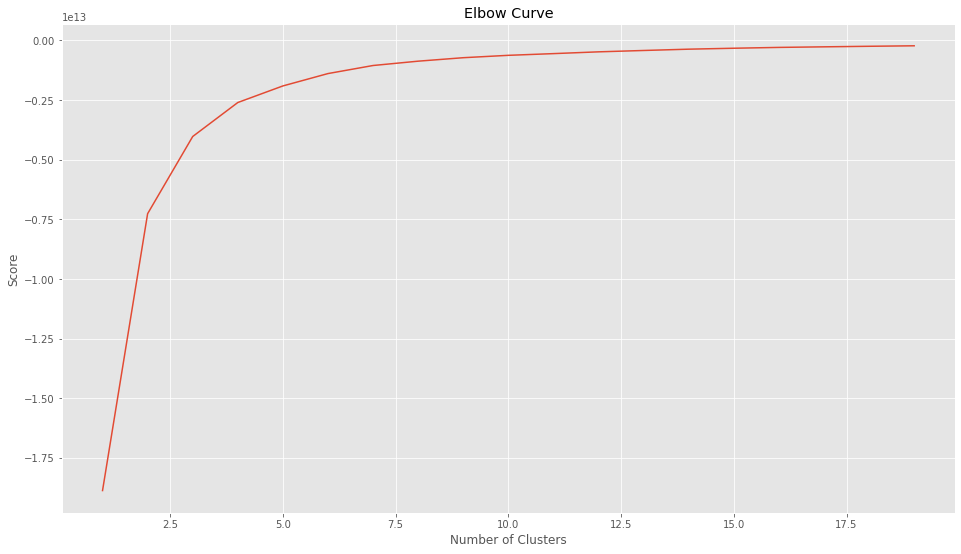

In [53]:
#graficamos

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [54]:
#Observando el grafico decidimos coger 5 clusters, pues vemos que hay un claro punto de inflexion en la gráfica

kmeans = KMeans(n_clusters=5).fit(data_kmeans)
centroids = kmeans.cluster_centers_
print(centroids)

[[9.87748439e+03 6.10028382e+00 1.97675970e+03 1.98706244e+03
  1.03106339e+03 1.63765374e+00 4.69252602e-01 2.89782403e+00
  1.83727531e+00 1.69795051e+05]
 [1.22158474e+04 7.20287253e+00 1.99200359e+03 1.99776481e+03
  1.29194434e+03 1.94254937e+00 5.15260323e-01 2.98743268e+00
  2.25314183e+00 2.41599203e+05]
 [1.40902075e+04 8.31603774e+00 1.99865566e+03 2.00318868e+03
  1.59807075e+03 2.03301887e+00 5.66037736e-01 2.99056604e+00
  2.72641509e+00 3.45207434e+05]
 [8.27598028e+03 4.94741784e+00 1.94864601e+03 1.96991080e+03
  7.99139906e+02 1.18122066e+00 1.67136150e-01 2.70892019e+00
  1.20469484e+00 1.14872281e+05]
 [1.76317949e+04 9.38461538e+00 2.00179487e+03 2.00487179e+03
  2.07325641e+03 2.25641026e+00 7.94871795e-01 3.00000000e+00
  3.00000000e+00 5.17060923e+05]]


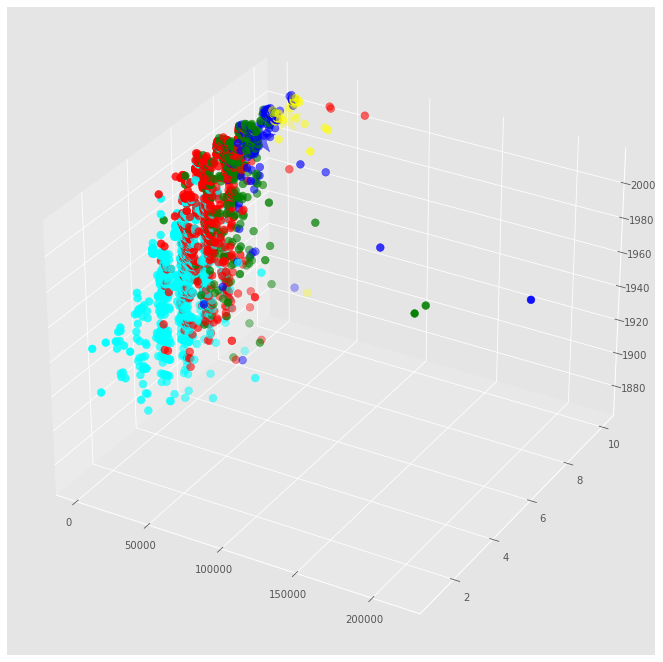

In [55]:
# Obtenemos las etiquetas de cada punto de nuestros datos

X = data_kmeans
labels = kmeans.predict(data_kmeans)

# Obtenemos los centroids

C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

#pinta en colores los diferentes grupos de cluster que hemos logrado con el K means. 
#Vemos que hay poco solapamiento y hay suficiente diferenciación. 

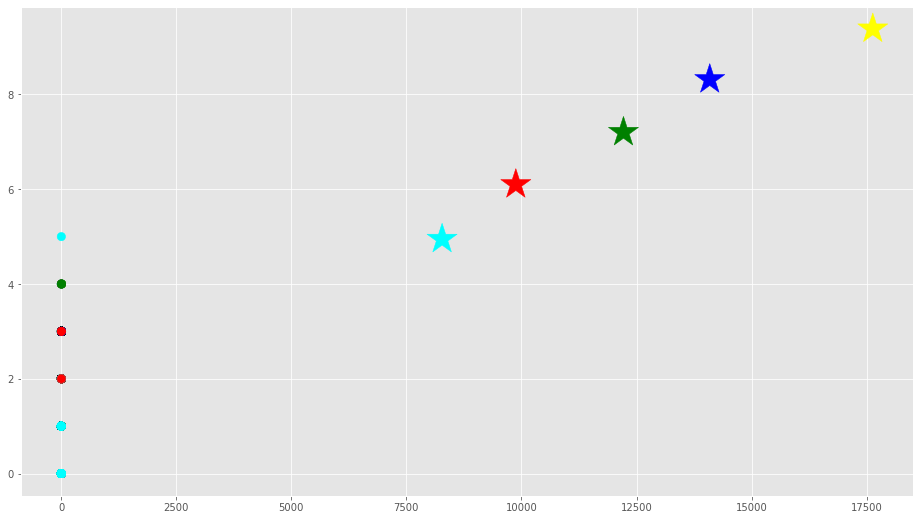

In [56]:
# Hacemos una proyección a 2D con los diversos ejes 

f1 = data_kmeans['Overall_Qual'].values
f2 = data_kmeans['Garage_Cars'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [57]:
data_kmeans['label'] = labels

In [58]:
data_kmeans.groupby("label").size()

#vemos cuantos individuos conforman los distintos clusters que hemos creado. 

label
0    1057
1     558
2     212
3    1064
4      39
dtype: int64

##### Pregunta 3: Estudiaste la relación de la variable precio con el resto de las variables cuantitativas durante el año 2009 y 2010. Estudia la correlación entre ellas y argumenta el uso de PCA o KernelPCA en base a esas relaciones.



In [59]:
# Mismo pero en 2009-2010
# Filtramos primero por año 2009 y 2010

data_09_10 = data[data['Yr_Sold'].isin([2009,2010])]
data_09_10.head(2)

#selccionamos solo variables numericas 

data_09_10_numeric = data_09_10.select_dtypes(include=np.number)
data_09_10_numeric.head(5)

,Order,Lot_Frontage,Lot_Area,Overall_Qual,Year_Built,Year_Remod/Add,Total_Bsmt_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Garage_Cars,Garage_Area,Pool_Area,Mo_Sold,Yr_Sold,SalePrice
0,1,141.0,31770,6,1960,1960,1080,1,0,3,1,7,2,528.0,0,5,2010,215000
1,2,80.0,11622,5,1961,1961,882,1,0,2,1,5,1,730.0,0,6,2010,105000
2,3,81.0,14267,6,1958,1958,1329,1,1,3,1,6,1,312.0,0,6,2010,172000
3,4,93.0,11160,7,1968,1968,2110,2,1,3,1,8,2,522.0,0,4,2010,244000
4,5,74.0,13830,5,1997,1998,928,2,1,3,1,6,2,482.0,0,3,2010,189900


In [60]:
corr = data_09_10_numeric.corr().loc[['SalePrice']].sort_values('SalePrice',ascending=False)
corr = corr.T.sort_values('SalePrice',ascending=False)

<AxesSubplot:>

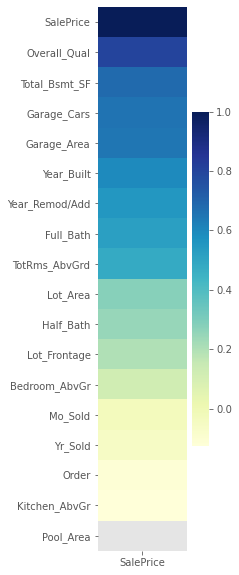

In [61]:
plt.subplots(figsize=(2,10))
sns.heatmap(corr, cmap="YlGnBu")

### Argumentacion del por qué usar PCA frente a Kernel:

Si gran parte del grafico fuerea linal significaria que no hay mucha correlacion lineal entre los datos. 
Sin embargo en el grafico la mayoria es azul.Lo que significa que se puede obtener una relacion lineal sobre 
la que hacer un PCA. Si esta situacion no se diera, aplicariamos Kernel PCA. 
Ya que se observa que hay una relacion lineal de Sales Prices con varias variables
A continuacion muestro en los siguientes graficos que las variables si que siguen una relacion lineal. 

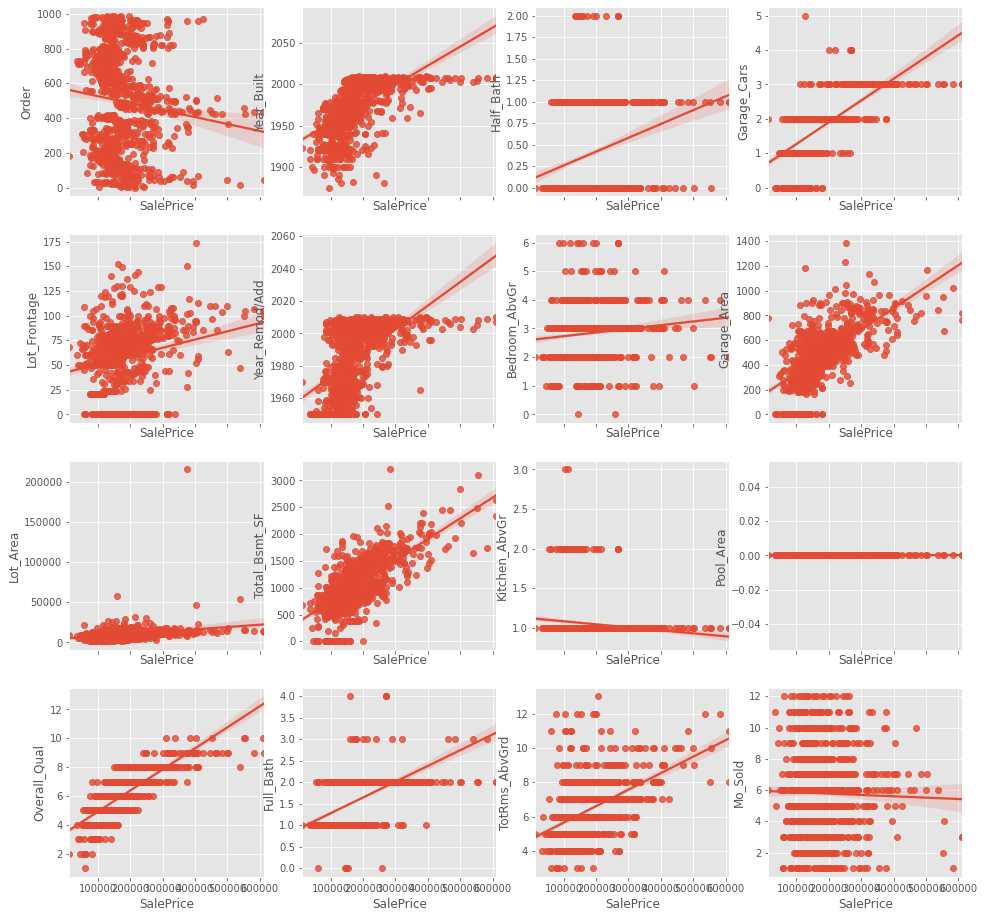

In [62]:
cols = data_09_10_numeric.columns.to_list()
cols.remove("SalePrice")
cols.remove("Yr_Sold")

fig, axes = plt.subplots(4, 4, figsize=(16, 16), sharex=True)
for x in range(0,4):
    for y in range(0,4):
        sns.regplot(ax=axes[x][y], x = data_09_10_numeric["SalePrice"], y= data_09_10_numeric[cols[y*4 + x]])
plt.show()

##### Pregunta 3.1: Aplica el modelo elegido y describe las 3 primeras componentes generadas, ¿qué varianza explica cada una? ¿Con qué variables se relacionada cada una? ¿Cómo indicadores de varianza en el sistema y en base a la relación con otras variables que nombres les darías?

Como hemos discutido en el anterior apartado, cuando existe una relacion lineal entre los datos se utiliza PCA. 

#### Realizamos PCA

In [63]:
train_index = np.random.choice(data_09_10.index,round(data_09_10.shape[0]*0.8),replace=False)
test_index = data_09_10.index[data_09_10.index.isin(train_index) == False]

data_train_09_10 = data_09_10.copy().iloc[train_index,]
data_test_09_10 = data_09_10.copy().iloc[test_index,]
data_test_09_10 = data_09_10.copy().drop(train_index, axis=0)


from sklearn.model_selection import train_test_split
dt_train_09_10, dt_test_09_10 = train_test_split(data_09_10, test_size =0.2)

dt_train_09_10.reset_index(drop=True)

dt_num_train_09_10 = dt_train_09_10.select_dtypes(include=np.number)

In [64]:
dt_num_train_PCA_09_10 = dt_num_train.loc[:,vars_wo_ms]
dt_num_test_PCA_09_10 = dt_test_09_10.loc[:,vars_wo_ms]

In [65]:
train_scaler_09_10 = StandardScaler().fit(dt_num_train_PCA_09_10)

x_train_09_10 = train_scaler_09_10.transform(dt_num_train_PCA_09_10)

x_test_09_10 = train_scaler_09_10.transform(dt_num_test_PCA_09_10)

In [66]:
pca_09_10 = PCA(n_components=3)
pcaNumModel_09_10 = pca_09_10.fit(x_train_09_10)
principalComponents_09_10 = pcaNumModel_09_10.transform(x_train_09_10)

print(np.sum(pcaNumModel_09_10.explained_variance_ratio_))
#salida --> 68,05% con 3 componentes, esta por encima del 50% entonces es satisfactorio el PCA.

0.6817702610884528


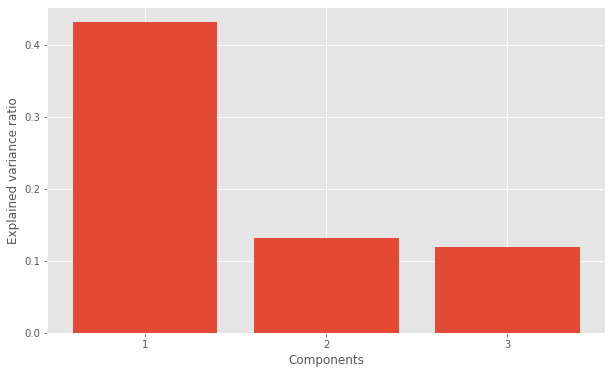

In [67]:
ev_09_10 = pca_09_10.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(ev) + 1, 1), ev_09_10)
ax.set_xticks(np.arange(1, len(ev) + 1, 1))
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')

plt.show()

# PARTE 2

#### Pregunta 4: En el análisis anterior os pedimos segmentar la variable precio de venta. Elige un par de variables continuas más relacionadas con el valor de la vivienda y realiza un análisis clúster. La nueva variable será la categorización no sólo del precio, si no del valor. Representar gráficamente la relación de esta nueva variable categórica (el clúster) con las variables cuantitativas de modo conjunto, también los centroides. Interpretar los resultados. (durante los años 2009/2010)

- Opción 1 (extremadamente facil): 8/9 

    * Selecciono dos variables continuas correladas con el el precio.

    * Aplico un kmedias sobre estas dos variables.

    * Represento los datos con respecto a los grupos y el precio (categorizado).

- Opción 2 (buena solución): 10

    * Selecciono las componentes relacionadas con el precio de un kernelPCA
 
    * Aplico distintos algoritmos de clustering y me quedo con el que mejor resultados de con respeto a la     
    clase precio.
 
    * Mido el MI y la relación entre los grupos generados y el precio.

- Opción 3 (perfecta): 11

    * LDA



#### OPCION 1:

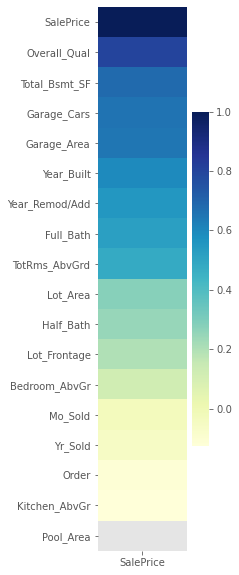

In [68]:
#Lo realizamos sobre el 2009 y 2010 

#Realizo la matriz de correlaciones, para ver cual esta mas relacionada con el precio, identificamos
#las variables mas cercana al Precio de la vivienda. 

corr = data_09_10_numeric.corr().loc[['SalePrice']].sort_values('SalePrice',ascending=False)
corr = corr.T.sort_values('SalePrice',ascending=False)
plt.subplots(figsize=(2,10))
sns.heatmap(corr, cmap="YlGnBu")

#seleccionamos las mas cercanas, la intensidad mas alta sin importar el signo. 

vars_relevantes_09_10 = data_09_10_numeric.columns[data_09_10_numeric.columns.isin(['SalePrice',
                                                             'Overall_Qual','Total_Bsmt_SF'])]

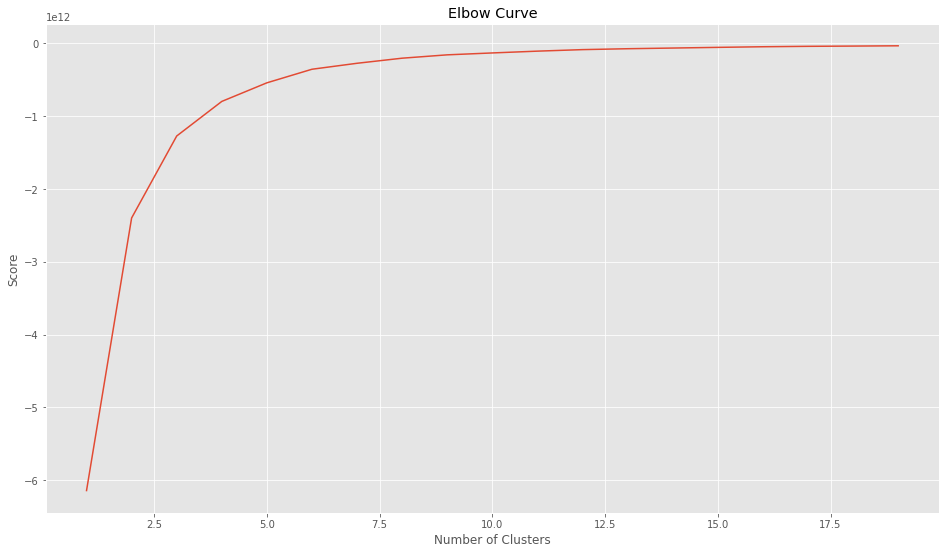

In [69]:
#sobre este conjunto aplicamos kmeans

data_kmeans_09_10 = data_09_10_numeric.loc[:,vars_relevantes_09_10]

Nc_09_10 = range(1, 20)

kmeans_09_10 = [KMeans(n_clusters=i) for i in Nc_09_10]

#kmeans

score_09_10 = [kmeans_09_10[i].fit(data_kmeans_09_10).score(data_kmeans_09_10) for i in range(len(kmeans_09_10))]
score_09_10

#graficamos

plt.plot(Nc_09_10,score_09_10)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


[[4.82315113e+00 7.74302251e+02 1.08685090e+05]
 [7.19047619e+00 1.30135238e+03 2.35840148e+05]
 [9.23076923e+00 2.25584615e+03 5.20259769e+05]
 [5.92525773e+00 9.80610825e+02 1.63454255e+05]
 [8.40298507e+00 1.67402985e+03 3.41713716e+05]]


label
0    311
1    210
2     13
3    388
4     67
dtype: int64

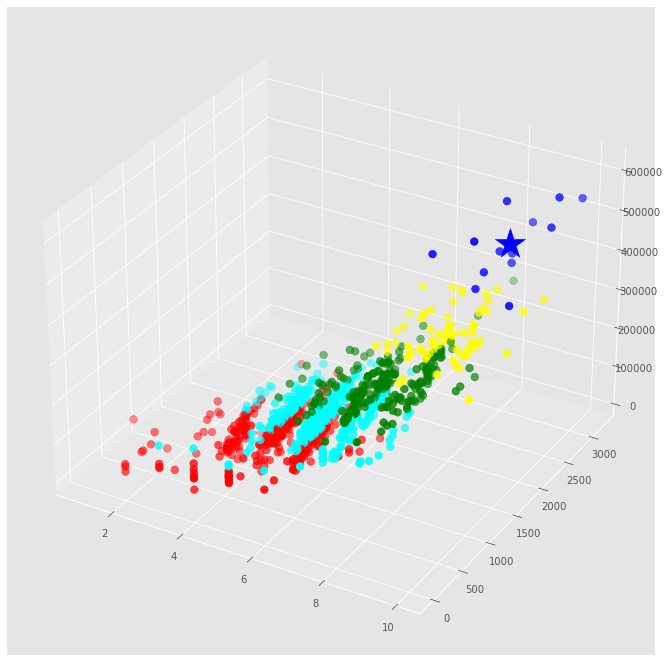

In [70]:
# Decidimos coger 5 clusters

kmeans_09_10 = KMeans(n_clusters=5).fit(data_kmeans_09_10)
centroids_09_10 = kmeans_09_10.cluster_centers_
print(centroids_09_10)

# Obtenemos las etiquetas de cada punto de nuestros datos

X_09_10 = data_kmeans_09_10
labels_09_10 = kmeans_09_10.predict(data_kmeans_09_10)

# Obtenemos los centroids

C_09_10 = kmeans_09_10.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]

for row in labels_09_10:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_09_10.iloc[:, 0], X_09_10.iloc[:, 1], X_09_10.iloc[:, 2], c=asignar,s=60)
ax.scatter(C_09_10[:, 0], C_09_10[:, 1], C_09_10[:, 2], marker='*', c=colores, s=1000)

#Vemos que hay poco solapamiento y hay suficiente diferenciación.

data_kmeans_09_10['label'] = labels_09_10

data_kmeans_09_10.groupby("label").size()


#vemos cuantos individuos conforman los distintos clusters que hemos creado.

# DURANTE ESOS DOS AÑOS PARA EL PRECIO DE LA VIVIENDA SE OBSERVA QUE INFLUIA MUCHO DOS COSAS_ CALIDAD DE LOS MATERIALES 
#Y la existencia de sotano(m2). 



- Opción 2 (buena solución): 10

 Selecciono las componentes relacionadas con el precio de un kernelPCA

 Aplico distintos algoritmos de clustering y me quedo con el que mejor resultados de con respeto a la clase precio.

 Mido el MI y la relación entre los grupos generados y el precio.



In [71]:
# He intentado realizar el kernel PCA utilizando el codigo que muestro a continuacion pero no soy capaz de solucionar
#el error que me da al ejecutar el codigo.

In [72]:
X_panda = data_09_10_numeric.loc[:,"Overall_Qual"]
Y_panda = data_09_10_numeric.loc[:,"Total_Bsmt_SF"]

#Convertimos X e y en un array

X = X_panda.to_numpy()
Y = Y_panda.to_numpy()

In [73]:
np.random.seed(1000)

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=10.0, random_state=1000)

#rbf se utiliza para que sea un radial "radial basis function", gamma 10 es para que tenga la precison mas alta. 
# n_components, determinamos que haya 2 componentes. 

#fit transform extrae los datos del pca que hemos realizado. 
X_pca = kpca.fit_transform(X)

# Show the results
sns.set()

fig, ax = plt.subplots(1, 2, figsize=(22, 8))

ax[0].scatter(X[Y == 0, 0], X[Y == 0, 1])
ax[0].scatter(X[Y == 1, 0], X[Y == 1, 1])
ax[0].set_xlabel(r'$x_1$', fontsize=16)
ax[0].set_ylabel(r'$x_2$', fontsize=16)
ax[0].set_title('Original dataset', fontsize=16)

ax[1].scatter(X_pca[Y == 0, 0], X_pca[Y == 0, 1])
ax[1].scatter(X_pca[Y == 1, 0], X_pca[Y == 1, 1])
ax[1].set_xlabel('First component', fontsize=16)
ax[1].set_ylabel('Second component', fontsize=16)
ax[1].set_title('RBF Kernel PCA projected dataset', fontsize=16)

plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 6  5  6  7  5  6  8  8  8  7  6  6  6  7  8  8  8  9  4  6  6  7  7  6
  5  5  4  4  7  6  5  6  6  6  7  6  9  8  9  8  7  9  8  7  9  7  9  8
  9  8  7  6  7  8  7  6  7  7  7  9  8  7  8  8  7  8  8  7  7  8  7  6
  7  7  7  6  6  6  6  7  6  6  5  6  5  5  5  5  5  6  7  8  8  7  7  7
  7  7  6  7  6  6  7  7  8  8  8  8  6  7  6  6  6  6  7  6  6  5  6  4
  5  5  6  5  6  5  5  5  6  5  3  5  6  5  6  5  7  6  5  7  5  5  5  6
  5  5  5  6  4  5  5  5  5  4  5  5  5  6  6  5  7  6  5  5  5  6  5  6
  6  4  4  5  5  5  3  4  5  5  6  5  5  2  6  8  5  8  5  6  4  4  6  5
  7  4  6  6  5  6  5  5  6  7  4  6  6  5  4  5  7  5  5  5  6  4  5  5
  4  4  5  5  5  5  5  6  5  5  5  6  7  7  4  4  7  6  3  5  6  5  4  5
  6  7  5  4  6  7  6  7  6  8  7  7  7  7  6  6  5  7  6  5  6  5  5  8
  8  7  7  7  6  6  8  7  7  3  5  5  5  4  6  6  4  4  6  4  5  5  6  3
  5  6  4  5  6  7  5  7  7  7  8  8  7  4  2  6  4  4  5  4  8  8  6  7
  6  6  5  7  7  5  8  7  8  9  5  5  6  5  4  5  5  4  4  4  4  5  5  5
  5  5  5  8  6  6  6  8  6  8  7  9  7  8  8  8  8  7  7  6  6  6  6  6
  6  6  6  7  7  8  9  8  7  5  7  6  7  6  7  6  7  7  6  8  7  7  5  7
  8  8  8  5  6  7  6  6  5  5  6  5  5  4  4  4  4  4  6  5  5  6  6  5
  6  6  6  7  6  6  6  6  6  7  5  5 10  9  9 10  9  8  8  9  9  9 10 10
 10  9  9  8  8  8  9  8  9  9  9  8  8  7  7 10  9  8  8  6  6  6  7  7
 10  8  9  9  8  8  7  7  7  6  6  6  7  7  7  7  7  7  7  6  7  7  8  7
  7  7  7  7  8  6  7  6  6  7  7  6  7  7  8  8  8  8  8  7  8  7  7  8
  8  7  8  8  8  8  8  8  7  9  7  8  6  7  8  7  9  9  8 10  8  8  7  8
  7  7  7  7  7  7  7  6  7  8  7  7  5  5  7  7  8  7  6  6  6  7  6  6
  4  6  5  5  5  5  5  5  5  5  5  8  7  7  6  6  6  6  6  6  7  8  8  8
  7  8  4  6  6  6  7  7  6  6  6  5  6  7  6  7  8  5  5  5  7  6  6  4
  5  6  4  5  5  6  5  5  5  5  6  5  6  5  4  5  6  6  6  5  6  5  5  6
  6  6  7  6  6  4  5  6  7  6  6  6  5  5  4  6  5  5  6  5  5  4  5  5
  5  5  3  7  5  6  3  5  5  4  5  5  4  7  2  4  5  3  6  6  6  5  6  6
  5  6  6  5  3  6  4  5  5  5  5  5  5  4  6  6  5  6  5  6  5  6  6  5
  5  5  5  5  4  5  7  5  4  5  5  4  2  3  5  5  4  4  5  5  7  6  6  8
  4  7  5  5  6  6  4  3  5  6  7  5  6  4  6  5  6  5  6  5  5  4  2  5
  5  5  5  6  7  6  7  7  6  5  6  4  6  7  6  4  6  4  5  5  5  1  6  5
  5  5  6  5  5  6  5  5  5  5  6  5  2  4  5  4  4  5  3  4  6  5  5  6
  4  5  4  5  5  6  4  7  6  8  7  7  7  8  5  5  5  5  5  5  5  5  5  7
  7  7  9  8  8  9  8  8  8  9  7  7  8  7  8  6  7  7  5  5  5  6  7  7
  5  5  7  7  7  6  7  7  7  7  7  7  5  5  5  5  5  5  5  5  5  5  7  8
  8  8  9  7  7  8  7  8  7  7  7  7  7  6  6  8  7  7  6  6  4  5  4  7
  6  4  6  9  6  5  4  5  4  5  3  5  5  4  6  5  5  5  5  2  6  7  6  4
  6  6  7  6  7  7  7  5  6  5  5  5  5  7  5  7  6  5  6  6  6  6  6  6
  6  7  6  5  5  5  3  4  8  2  8  7  7  6  6  6  5  7  5  6  7  9  7  9
  9  8  6  6  7  8  7  9  9  5  5  6  6  4  5  4  5  4  4  4  5  6  5  5
  5  5  5  6  5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Pregunta 5: Realiza una proyección de las variables número de cocina, piscina y plaza de garaje usando tsne, umap o isomap en dos dimensiones, ¿cómo se distribuye el precio en esta proyección? ¿Se identifica algo interesante? (se ve que los grupos de ítems tienen precios similares? se pueden sacar conclusiones similares a las de la pregunta 4 del análisis descriptivo?)

Opción única: 

* Aplicar tsne

* Dibujar los componentes con respecto al precio

<AxesSubplot:>

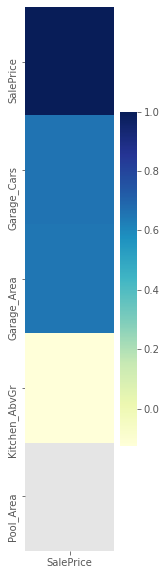

In [84]:
#seleccionamos el conjunto de datos que solo contenga esas columnas: 

vars_tsne = data_09_10_numeric.columns[data_09_10_numeric.columns.isin(['Kitchen_AbvGr','Pool_Area','Garage_Cars',
                                                                        'Garage_Area','SalePrice'])]

data_tsne = data_09_10_numeric.loc[:,vars_tsne]


#Hacemos una matriz de correlacion 

corr_tsne = data_tsne.corr().loc[['SalePrice']].sort_values('SalePrice',ascending=False)
corr_tsne = corr_tsne.T.sort_values('SalePrice',ascending=False)
plt.subplots(figsize=(2,10))
sns.heatmap(corr_tsne, cmap="YlGnBu")

#vemos que el que mas influencia tiene es el garage area y garage cars, pero aun asi cogemos tambien el resto de variables que especifica
#en el enunciado. aun asi influye ligeramente mas el area de la cocina que el area de la piscina. 

In [85]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler

data_tsne.drop(['SalePrice'],axis=1,inplace=True)

nrm = Normalizer()

nrm.fit(data_tsne)

normal_data = nrm.transform(data_tsne)

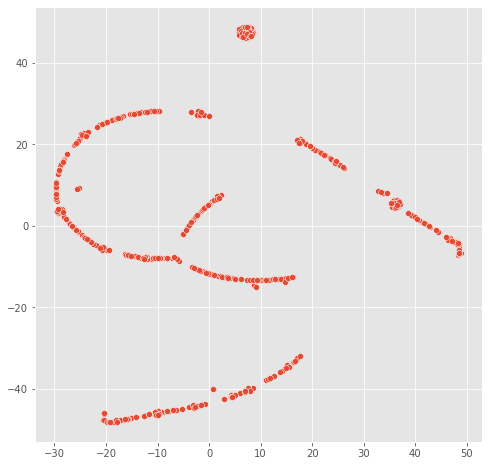

In [86]:
from sklearn.manifold import TSNE
tsn = TSNE(random_state=20)
res_tsne = tsn.fit_transform(normal_data)
plt.figure(figsize=(8,8))
sns.scatterplot(res_tsne[:,0],res_tsne[:,1]);

#vemos que hay una separacion de 5 cluster. 5 grupos de viviendas, o sea 5 tramos de precios. 

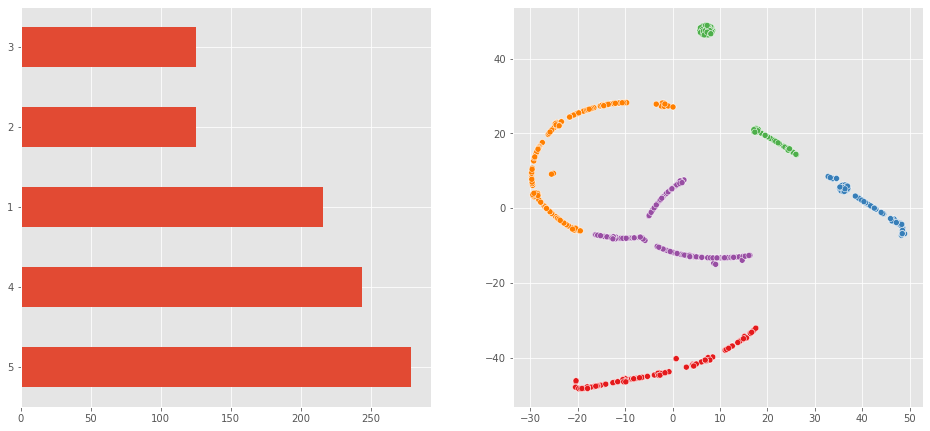

In [87]:
from scipy.cluster.hierarchy import dendrogram, ward, linkage,fcluster
from scipy.spatial.distance import pdist

link = ward(res_tsne)

vb = fcluster(link,t=300, criterion='distance')

fig = plt.figure(figsize=(25,25))

ax1 = fig.add_subplot(3,3,1)

pd.value_counts(vb).plot(kind='barh')

ax2 = fig.add_subplot(3,3,2)

axpl_2 = sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],hue=vb,palette="Set1");


axpl_2.legend_.remove()

#vemos que no hay solapamiento o ruido, los colores no estan sobrepuestos

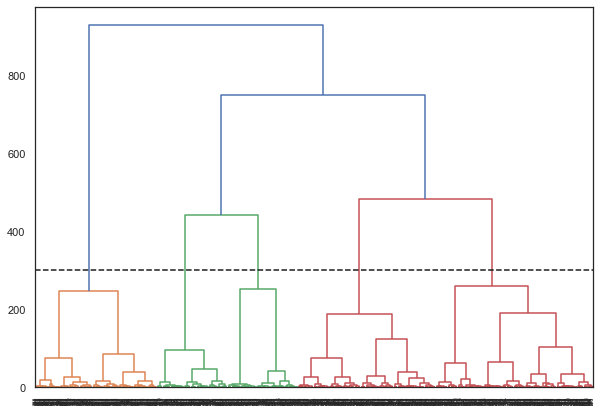

In [88]:
#Dibujamos dendograma

sns.set(style='white')
plt.figure(figsize=(10,7))
dendrogram(link)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [300,300],'--', c='k')
ax.plot(bounds,'--', c='k')
plt.show()

#corta 5, o sea se repite que hemos visto en el anterior grafico. 

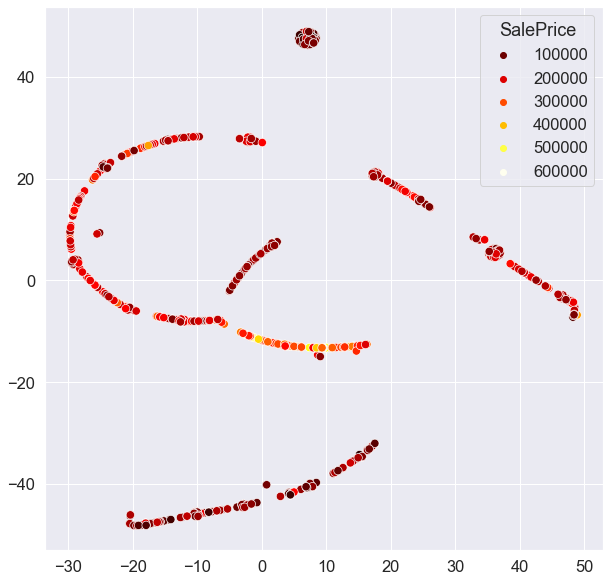

In [89]:
#segmentamos por rangos de precios, pero vemos que no hay una influencia en el precio de estas caracteristicas.
#respecto al precio no hay ninguna diferencia. respecto a las caracteristicas, hay 5 grupos. 

plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],\
                     hue=data_09_10_numeric['SalePrice'],s=70,palette="hot");#,palette="RdBu");

#### Pregunta 5.1: ¿Se distinguen bien las viviendas de fachada de piedra de las de ladrillo al proyectar?



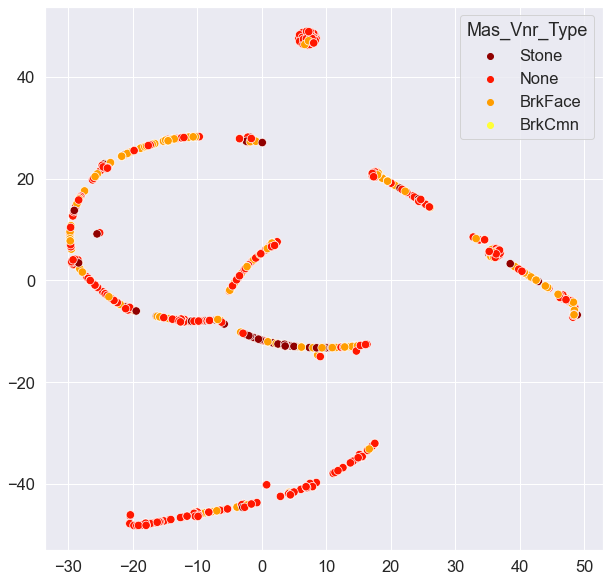

In [90]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],\
                     hue=data_09_10['Mas_Vnr_Type'],s=70,palette="hot");#,palette="RdBu");


#no hay diferenciacion, hay mucho ruido, esta mezclado. No hay un limite entre ambas. 

#### Pregunta 6: Se describieron las principales características de las viviendas que tienen fachada de piedra frente a las que tienen fachada de ladrillo visto. Compara el resultado de un análisis clúster sobre las variables más importantes de esta comparativa (si son demasiada aplica un PCA previo) con la variable tipo de piedra, ¿el clúster generado representa bien esa variable objetivo?

In [91]:
#dividemos el conjunto de datos en 2 y luego haremos el analisis cluster 
#todo lo que tenga bruick y todo lo qu econtenga stone 
valores_brick = data["Mas_Vnr_Type"].unique()

#print(valores_brick)

#grupo_brick = data[data.isin(data)== %brick%]
grupo_brick = data[data["Mas_Vnr_Type"].isin(["BrkFace", "BrkCmn"])]
grupo_stone = data[data["Mas_Vnr_Type"].isin(["Stone"])] 

#print(grupo_brick.head(2))
#print(grupo_stone.head(2))


In [92]:
#seleccionamos los numericos

grupo_brick_numerico = grupo_brick.select_dtypes(include=np.number)
grupo_stone_numerico = grupo_stone.select_dtypes(include=np.number)

print(grupo_brick_numerico.head())
print(grupo_stone_numerico.head())

    Order  Lot_Frontage  Lot_Area  Overall_Qual  Year_Built  Year_Remod/Add  \
2       3          81.0     14267             6        1958            1958   
5       6          78.0      9978             6        1998            1998   
15     16          47.0     53504             8        2003            2003   
20     21         105.0     11751             6        1977            1977   
21     22          85.0     10625             7        1974            1974   

    Total_Bsmt_SF  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
2            1329          1          1              3              1   
5             926          2          1              3              1   
15           1650          3          1              4              1   
20           1844          2          0              3              1   
21           1053          2          0              3              1   

    TotRms_AbvGrd  Garage_Cars  Garage_Area  Pool_Area  Mo_Sold  Yr_Sold  \
2         

In [93]:
print(missing_summary(grupo_brick_numerico))
print(missing_summary(grupo_stone_numerico))

#no hay missing 

                total  missing  missing_rate (%)
Order            2930        0               0.0
MS_Zoning        2930        0               0.0
Lot_Frontage     2930        0               0.0
Lot_Area         2930        0               0.0
Land_Contour     2930        0               0.0
Land_Slope       2930        0               0.0
Overall_Qual     2930        0               0.0
Year_Built       2930        0               0.0
Year_Remod/Add   2930        0               0.0
Mas_Vnr_Type     2930        0               0.0
Exter_Qual       2930        0               0.0
Bsmt_Cond        2930        0               0.0
Total_Bsmt_SF    2930        0               0.0
Heating_QC       2930        0               0.0
Central_Air      2930        0               0.0
Full_Bath        2930        0               0.0
Half_Bath        2930        0               0.0
Bedroom_AbvGr    2930        0               0.0
Kitchen_AbvGr    2930        0               0.0
Kitchen_Qual     293

In [94]:
#hacemos PCA, definimos funcion al igual que para Kmedias. 

def PCA_grupos(grupo_fachada):

    train_scaler = StandardScaler().fit(grupo_fachada)

    x_train = train_scaler.transform(grupo_fachada)

    pca = PCA(n_components=3)
    pcaNumModel = pca.fit(x_train)
    pca_train = pcaNumModel.transform(x_train)


    print(np.sum(pcaNumModel.explained_variance_ratio_))
    
    #ver el contenido de las variables del PCA
    
    df = pd.DataFrame({'PCA':pca.components_[0], 'Variable Names':list(grupo_fachada.columns)})
    df = df.sort_values('PCA', ascending=False)
    df2 = pd.DataFrame(df)
    df2['PCA']=df2['PCA'].apply(np.absolute)
    df2 = df2.sort_values('PCA', ascending=False)
    df.head()
    
    return df

In [95]:
PCA_grupos(grupo_brick_numerico)

0.5281104228633473


,PCA,Variable Names
17,0.388494,SalePrice
3,0.370292,Overall_Qual
12,0.361235,Garage_Cars
13,0.347130,Garage_Area
4,0.314906,Year_Built
5,0.301113,Year_Remod/Add
7,0.297952,Full_Bath
6,0.265953,Total_Bsmt_SF
11,0.254232,TotRms_AbvGrd
2,0.124486,Lot_Area


In [96]:
PCA_grupos(grupo_stone_numerico)

0.554002903021138


,PCA,Variable Names
3,0.371607,Overall_Qual
12,0.346329,Garage_Cars
13,0.338923,Garage_Area
17,0.335336,SalePrice
4,0.298337,Year_Built
11,0.287870,TotRms_AbvGrd
5,0.285353,Year_Remod/Add
6,0.279250,Total_Bsmt_SF
7,0.261899,Full_Bath
1,0.233508,Lot_Frontage


In [97]:
#elegimos el valor de corte como 0.25 hacia arriba. 
#vemos que no influyen de la misma manera. 

grupo_brick_relevantes = grupo_brick_numerico.loc[:,["SalePrice","Overall_Qual","Garage_Cars","Garage_Area","Year_Built",
                                                  "Year_Remod/Add","Full_Bath"]]
grupo_stone_relevantes = grupo_stone_numerico.loc[:,["Overall_Qual","Garage_Cars","SalePrice","Garage_Area","Year_Built", 
                                                  "Year_Remod/Add","TotRms_AbvGrd","Total_Bsmt_SF"]]

In [98]:
def k_means_grupos(tipo_fachada):
    
    Numero_centroides = range(1, 20)
    kmeans_fachada = [KMeans(n_clusters=i) for i in Numero_centroides]

    #kmeans

    score_fachada = [kmeans_fachada[i].fit(tipo_fachada).score(tipo_fachada) for i in range(len(kmeans_fachada))]
    score_fachada

    #graficamos

    plt.plot(Numero_centroides,score_fachada)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()


    # Decidimos coger 5 clusters

    kmeans_fachada = KMeans(n_clusters=5).fit(tipo_fachada)
    centroides_fachada = kmeans_fachada.cluster_centers_
    print(centroides_fachada)

    # Obtenemos las etiquetas de cada punto de nuestros datos

    X_fachada = tipo_fachada
    labels_fachada = kmeans_fachada.predict(tipo_fachada)

    # Obtenemos los centroids
    
    C_fachada = kmeans_fachada.cluster_centers_
    colores =['red','green','blue','cyan','yellow']
    asignar =[]
    for row in labels_fachada:
        asignar.append(colores[row])

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X_fachada.iloc[:, 0], X_fachada.iloc[:, 1], X_fachada.iloc[:, 2], c=asignar,s=60)
    ax.scatter(C_fachada[:, 0], C_fachada[:, 1], C_fachada[:, 2], marker='*', c=colores, s=1000)

    #Vemos que hay poco solapamiento y hay suficiente diferenciación.

    tipo_fachada['label'] = labels_fachada

    output_kmeans = tipo_fachada.groupby("label").size()

    return output_kmeans

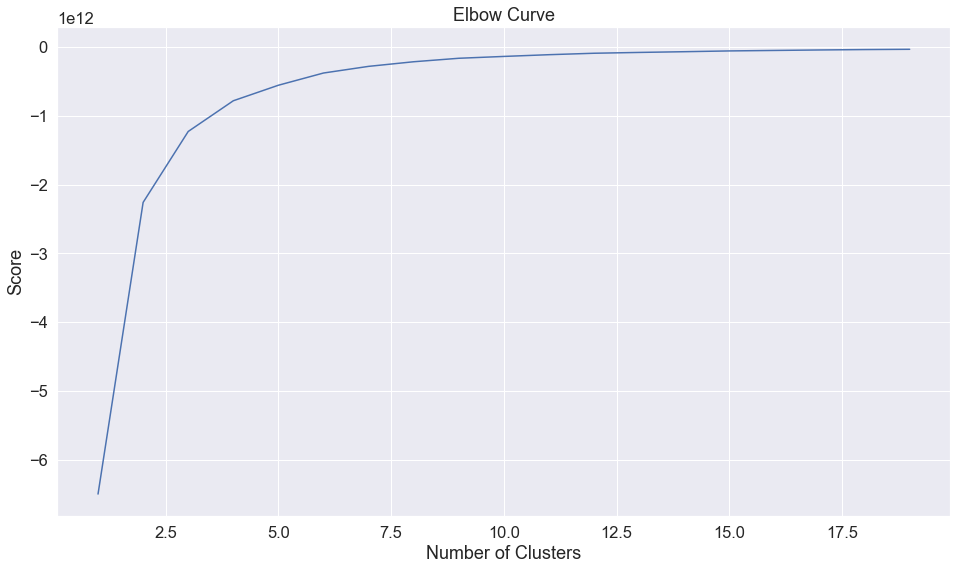

[[1.38680239e+05 5.54178674e+00 1.53890490e+00 4.13089337e+02
  1.96958213e+03 1.97517291e+03 1.30547550e+00]
 [2.79460404e+05 7.70175439e+00 2.50292398e+00 6.60654971e+02
  1.99600585e+03 1.99921053e+03 2.01754386e+00]
 [1.98152968e+05 6.64285714e+00 2.09740260e+00 5.36282468e+02
  1.98792857e+03 1.99190584e+03 1.90584416e+00]
 [5.70153111e+05 9.33333333e+00 3.00000000e+00 9.42111111e+02
  2.00155556e+03 2.00211111e+03 2.55555556e+00]
 [3.84792457e+05 8.67142857e+00 2.92857143e+00 8.19985714e+02
  2.00150000e+03 2.00301429e+03 2.02857143e+00]]


label
0    347
1    171
2    308
3      9
4     70
dtype: int64

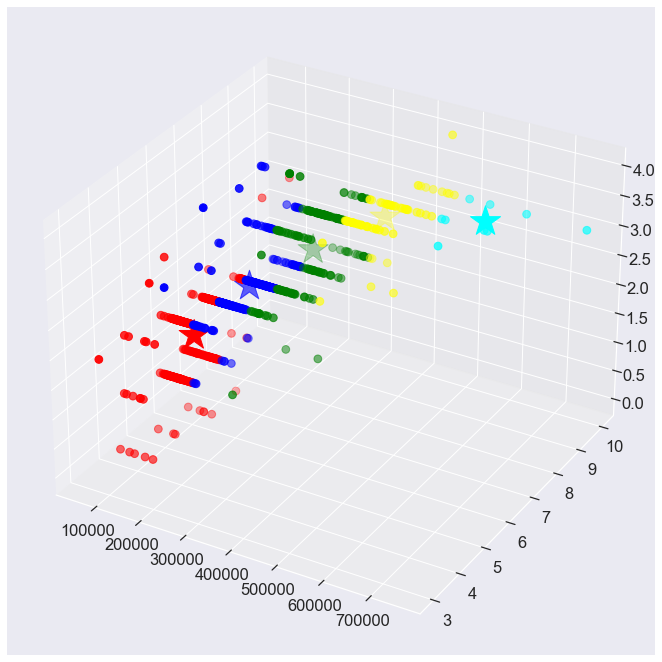

In [99]:
k_means_grupos(grupo_brick_relevantes)

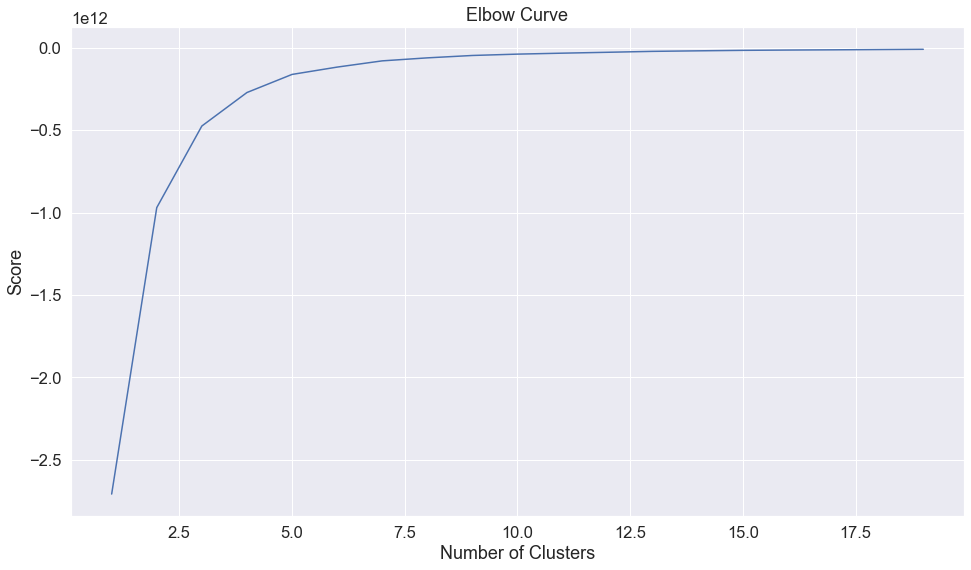

[[6.14492754e+00 1.82608696e+00 1.53512014e+05 4.88130435e+02
  1.97655072e+03 1.98250725e+03 6.40579710e+00 1.20366667e+03]
 [8.22413793e+00 2.84482759e+00 3.07329241e+05 7.77534483e+02
  2.00558621e+03 2.00662069e+03 7.65517241e+00 1.50113793e+03]
 [8.70967742e+00 2.90322581e+00 4.09072613e+05 7.85677419e+02
  2.00729032e+03 2.00764516e+03 8.19354839e+00 1.83722581e+03]
 [7.26829268e+00 2.29268293e+00 2.27531622e+05 6.33817073e+02
  2.00051220e+03 2.00228049e+03 6.45121951e+00 1.41124390e+03]
 [9.55555556e+00 3.00000000e+00 5.68889778e+05 8.47777778e+02
  2.00644444e+03 2.00700000e+03 9.66666667e+00 2.31922222e+03]]


label
0    69
1    58
2    31
3    82
4     9
dtype: int64

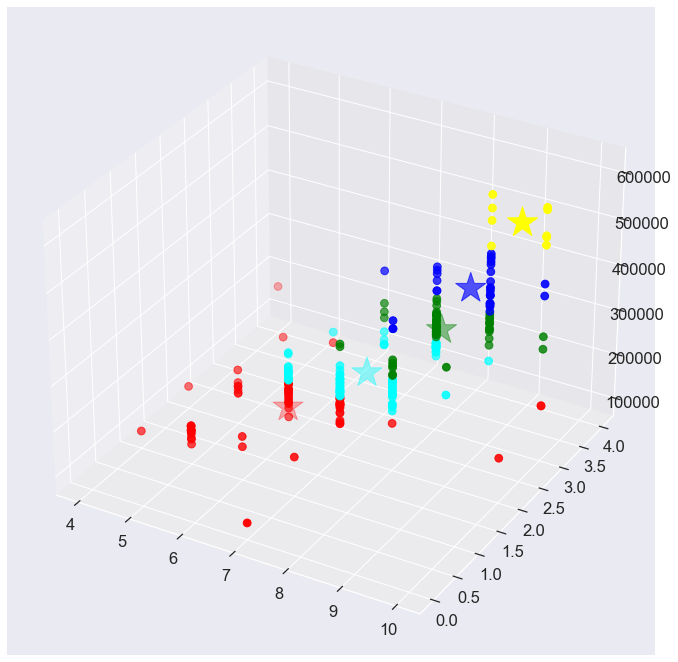

In [100]:
k_means_grupos(grupo_stone_relevantes)